In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
prompts_train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv")
prompts_test = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv")

summaries_train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv")
summaries_test = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv")

sample_submission = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv")

prompts_train

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [5]:
train = summaries_train.merge(prompts_train, how="left", on="prompt_id")#[:2000]
test = summaries_test.merge(prompts_test, how="left", on="prompt_id")

train

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
...,...,...,...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...


In [6]:
train.describe()

,content,wording
count,7165.000000,7165.000000
mean,-0.014853,-0.063072
std,1.043569,1.036048
min,-1.729859,-1.962614
25%,-0.799545,-0.872720
50%,-0.093814,-0.081769
75%,0.499660,0.503833
max,3.900326,4.310693


<Axes: >

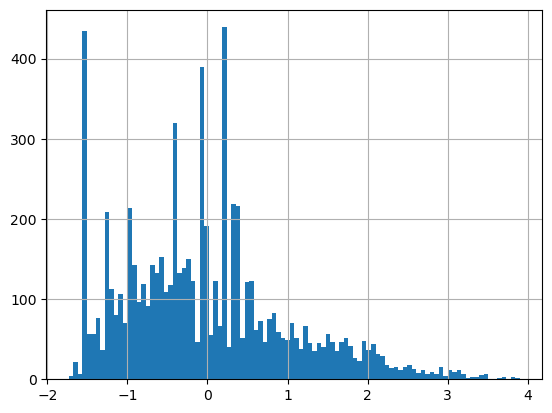

In [21]:
train.content.hist(bins=100)

<Axes: >

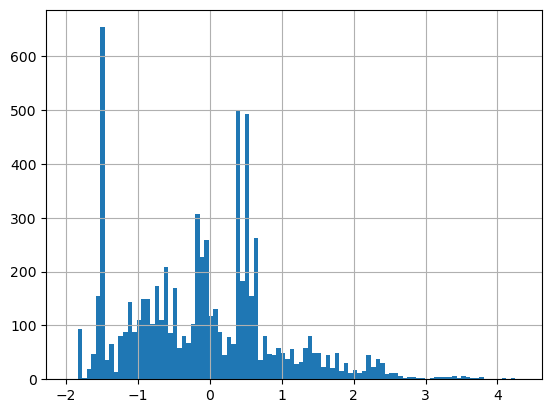

In [20]:
train.wording.hist(bins=100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


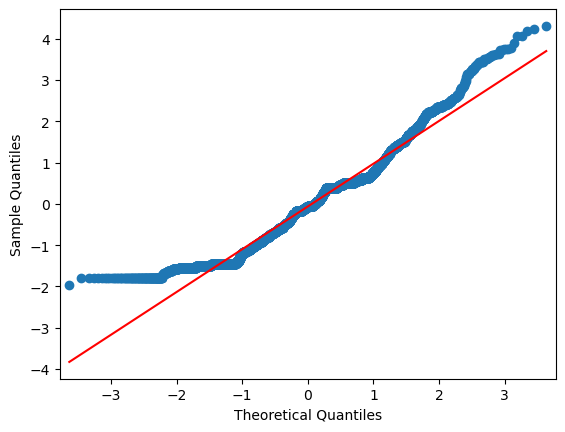

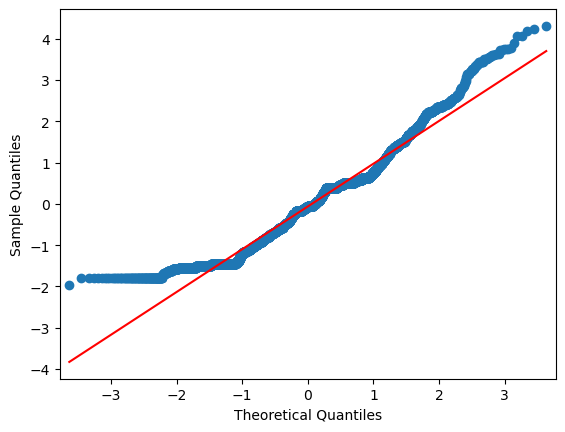

In [9]:
from statsmodels.graphics.gofplots import qqplot
qqplot(train.wording, line='s')

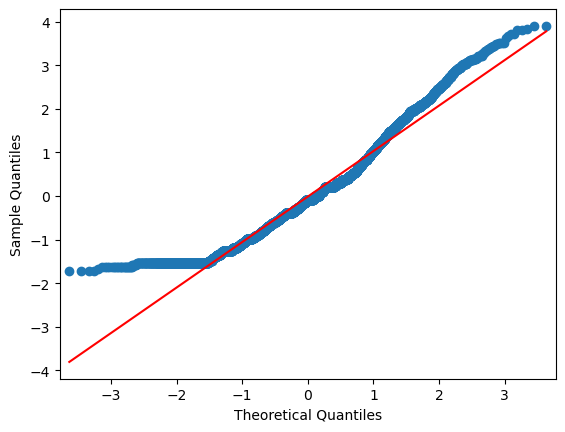

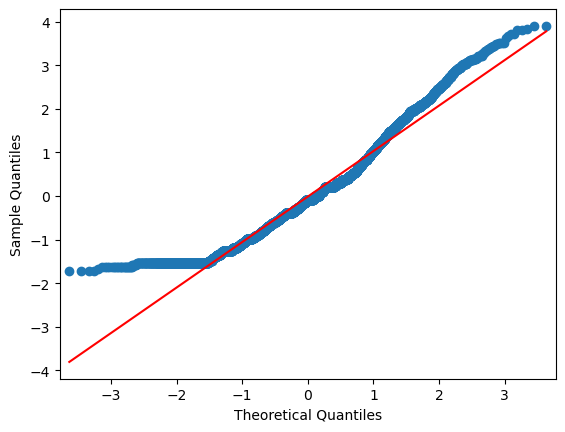

In [22]:
qqplot(train.content, line='s')

In [17]:
train['text_length'] = train['text'].apply(lambda x: len(x.split(' ')))
train

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",52
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,235
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,25
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,206
...,...,...,...,...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",67
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,44
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,59
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,59


<Axes: >

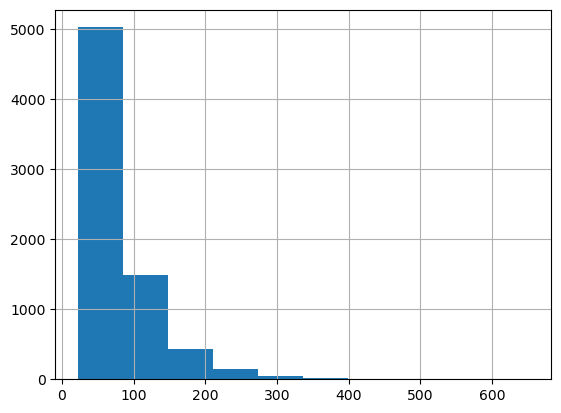

In [18]:
train.text_length.hist()

In [19]:
train[['text_length', 'content', 'wording']].corr()

,text_length,content,wording
text_length,1.000000,0.785671,0.53154
content,0.785671,1.000000,0.75138
wording,0.531540,0.751380,1.00000


In [23]:
train["syntax_count"] = train['text'].apply(lambda x: x.count(",") + x.count("-") + x.count(";") + x.count(":"))

In [26]:
train

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,syntax_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,0
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",52,0
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,235,19
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,25,0
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,206,5
...,...,...,...,...,...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",67,6
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,44,3
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,59,0
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,59,1


In [27]:
%%writefile train.py

import os
import shutil
import json
import warnings
import logging
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch

import transformers
from transformers import AutoModel, AutoTokenizer, AutoConfig, AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer

from datasets import Dataset,load_dataset, load_from_disk
from datasets import load_metric, disable_progress_bar

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, GroupKFold


warnings.simplefilter("ignore")
logging.disable(logging.ERROR)
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
disable_progress_bar()


class CFG:
    model_name="/kaggle/input/debertav3base"
    learning_rate=1.2e-5
    warmup_ratio=0.01
    weight_decay=0.02
    hidden_dropout_prob=0.01
    attention_probs_dropout_prob=0.01
    num_layers_to_freeze=100
    num_train_epochs=3
    n_splits=4
    batch_size=9
    random_seed=42
    save_steps=70
    max_length=512
    
def compute_mcrmse(eval_pred):
    """
    Calculates mean columnwise root mean squared error
    https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries/overview/evaluation
    """
    preds, labels = eval_pred

    col_rmse = np.sqrt(np.mean((preds - labels) ** 2, axis=0))
    mcrmse = np.mean(col_rmse)

    return {
        "content_rmse": col_rmse[0],
        "wording_rmse": col_rmse[1],
        "mcrmse": mcrmse,
    }

def get_splits_repeated_group_kfold(train):
    train_promts = [
        ['814d6b', 'ebad26'],
        ['814d6b', '3b9047'],
        ['814d6b', '39c16e'],
        ['ebad26', '3b9047'],
        ['ebad26', '39c16e'],
        ['3b9047', '39c16e'],
    ]
    splits = []
    for train_promt in train_promts:
        splits.append((
            train[train["prompt_id"].isin(train_promt)].index,
            train[~train["prompt_id"].isin(train_promt)].index
        ))
    return splits

def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    

def train_n_infer(train,
                  val,
                  model_name="roberta-base",
                  batch_size=4,
                  learning_rate=5e-5,
                  warmup_ratio=0,
                  weight_decay=0.01,
                  hidden_dropout_prob=0.0,
                  attention_probs_dropout_prob=0.0,
                  num_layers_to_freeze=0,
                  num_train_epochs=2,
                  save_steps=100,
                  random_seed=42,
                  max_length=512,
                  model_dir="bert"):
    train_content = train[["text", "text_length", "syntax_count", "content", "wording"]]
    val_content = val[["text", "text_length", "syntax_count", "content", "wording"]]
    test_ = test[["text"]]

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model_config = AutoConfig.from_pretrained(model_name)
    model_config.update({
        "hidden_dropout_prob": hidden_dropout_prob, # 0.0
        "attention_probs_dropout_prob": attention_probs_dropout_prob,
        "num_labels": 2,
        "problem_type": "regression",
    })
    seed_everything(seed=42)
    model_content = AutoModelForSequenceClassification.from_pretrained(model_name, config=model_config)
    
    for name, param in list(model_content.named_parameters())[: num_layers_to_freeze]:
        param.requires_grad = False
    
    train_dataset_content = Dataset.from_pandas(train_content, preserve_index=False) 
    val_dataset_content = Dataset.from_pandas(val_content, preserve_index=False) 
    
    def tokenize_function(examples):
        labels = [examples["content"], examples["wording"]]
        tokenized = tokenizer(examples["text"],
                         padding=False,
                         truncation=True,
                         max_length=max_length)
        return {
            **tokenized,
            "labels": labels,
        }
    
    def tokenize_function_test(examples):
        tokenized = tokenizer(examples["text"],
                         padding=False,
                         truncation=True,
                         max_length=max_length)
        return tokenized
    
    train_tokenized_datasets_content = train_dataset_content.map(tokenize_function, batched=False)
    val_tokenized_datasets_content = val_dataset_content.map(tokenize_function, batched=False)

    test_dataset = Dataset.from_pandas(test_, preserve_index=False) 
    test_tokenized_dataset = test_dataset.map(tokenize_function_test, batched=False)
    
    data_collator = DataCollatorWithPadding(
        tokenizer=tokenizer
    )
    model_dir = model_dir
    training_args = TrainingArguments(
        output_dir=model_dir,
        load_best_model_at_end=True,
        learning_rate=learning_rate,
        warmup_ratio=warmup_ratio,
#         gradient_accumulation_steps=64,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=8,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        report_to='none',
        disable_tqdm=True,
        greater_is_better=False,
        save_strategy="steps",
        evaluation_strategy="steps",
        eval_steps=save_steps,
        save_steps=save_steps,
        metric_for_best_model="mcrmse",
        save_total_limit=1
    )

    trainer_content = Trainer(
        model=model_content,
        args=training_args,
        train_dataset=train_tokenized_datasets_content,
        eval_dataset=val_tokenized_datasets_content,
        tokenizer=tokenizer,
        compute_metrics=compute_mcrmse,#compute_metrics,
        data_collator=data_collator
    )

    trainer_content.train()
    
    time.sleep(5)
    best_check = os.listdir(model_dir)[0]
    model_content = AutoModelForSequenceClassification.from_pretrained(f"{model_dir}/{best_check}")
    model_content.eval()

    test_args = TrainingArguments(
        output_dir=model_dir,
        do_train = False,
        do_predict = True,
        per_device_eval_batch_size = 4,   
        dataloader_drop_last = False,
    )

    # init trainer
    infer_content = Trainer(
                  model = model_content, 
                  tokenizer=tokenizer,
                  data_collator=data_collator,
                  args = test_args)

    val_results_content = infer_content.predict(val_tokenized_datasets_content)[0]
    test_results_content = infer_content.predict(test_tokenized_dataset)[0]
    
    model_content.save_pretrained(model_dir)
    tokenizer.save_pretrained(model_dir)
    
    try:
        shutil.rmtree(f"{model_dir}/{best_check}")
    except Exception:
        pass
    time.sleep(5)

    return val_results_content, test_results_content


def get_oof_pred_n_test(train,
                        model_name="/kaggle/input/berttiny",
                        n_splits=3,
                        batch_size=4,
                        learning_rate=5e-5,
                        warmup_ratio=0,
                        hidden_dropout_prob=0.0,
                        attention_probs_dropout_prob=0.0,
                        num_layers_to_freeze=0,
                        weight_decay=0.01,
                        num_train_epochs=2,
                        random_seed=42,
                        save_steps=100,
                        max_length=512
                       ):
#     kfl = KFold(n_splits=n_splits, random_state=random_seed, shuffle=True)
    kfl = GroupKFold(n_splits=n_splits)
    oof_content = np.zeros((len(train), 2))
    test_pred_content = np.zeros((len(test), 2))
    
    model_name_ = model_name.split("/")[-1]
    if not os.path.exists(model_name_):
        try:
            os.mkdir(model_name_)
        except Exception:
            pass
    time.sleep(5)
    
    for i, (train_indx, val_indx) in enumerate(kfl.split(train, groups=train["prompt_id"])):
#     for i, (train_indx, val_indx) in enumerate(get_splits_repeated_group_kfold(train)):
        print(f"fold {i}:")
        train_ = train.iloc[train_indx]
        val_ = train.iloc[val_indx]

        val_res_content, test_res_content  = train_n_infer(train_,
                                                           val_,
                                                           model_name=model_name,
                                                           batch_size=batch_size,
                                                           learning_rate=learning_rate,
                                                           warmup_ratio=warmup_ratio,
                                                           hidden_dropout_prob=hidden_dropout_prob,
                                                           attention_probs_dropout_prob=attention_probs_dropout_prob,
                                                           num_layers_to_freeze=num_layers_to_freeze,
                                                           weight_decay=weight_decay,
                                                           num_train_epochs=num_train_epochs,
                                                           save_steps=save_steps,
                                                           max_length=max_length,
                                                           random_seed=random_seed,
                                                           model_dir=f"{model_name_}/fold_{i}"
                                                           )
        
#         oof_content[val_indx] += val_res_content/3
#         test_pred_content += test_res_content/n_splits
        
        oof_content[val_indx] = val_res_content
        test_pred_content += test_res_content/n_splits
        
    oof_train = pd.DataFrame(oof_content, columns=[f"content_pred_{model_name_}", f"wording_pred_{model_name_}"])
    test_pred = pd.DataFrame(test_pred_content, columns=[f"content_pred_{model_name_}", f"wording_pred_{model_name_}"])

    cv_metric = compute_mcrmse((oof_train.values, train[["content", "wording"]]))
    print(f"cv mcrmse: {cv_metric}")
    with open(f"{model_name_}/cv_metric.json", "w") as outfile:
        json.dump(cv_metric, outfile)
        
    oof_train.to_csv(f"{model_name_}/oof_train.csv", index=False)
    test_pred.to_csv(f"test_pred.csv", index=False)
    
    return oof_train, test_pred


prompts_train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv")
prompts_test = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv")
summaries_train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv")
summaries_test = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv")
sample_submission = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv")

train = summaries_train.merge(prompts_train, how="left", on="prompt_id")#[:2000]
test = summaries_test.merge(prompts_test, how="left", on="prompt_id")

train["syntax_count"] = train['text'].apply(lambda x: x.count(",") + x.count("-") + x.count(";") + x.count(":"))
train['text_length'] = train['text'].apply(lambda x: len(x.split(' ')))


seed_everything(seed=42)
oof_train, test_pred  = get_oof_pred_n_test(train,
                                            model_name=CFG.model_name,
                                            learning_rate=CFG.learning_rate,
                                            warmup_ratio=CFG.warmup_ratio,
                                            hidden_dropout_prob=CFG.hidden_dropout_prob,
                                            attention_probs_dropout_prob=CFG.attention_probs_dropout_prob,
                                            num_layers_to_freeze=CFG.num_layers_to_freeze,
                                            weight_decay=CFG.weight_decay,
                                            num_train_epochs=CFG.num_train_epochs,
                                            n_splits=CFG.n_splits,
                                            batch_size=CFG.batch_size,
                                            random_seed=CFG.random_seed,
                                            save_steps=CFG.save_steps,
                                            max_length=CFG.max_length
                                           )

Overwriting train.py


In [28]:
!torchrun --nproc_per_node 2 train.py

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_trai

In [ ]:
test_pred = pd.read_csv(f"test_pred.csv")

sample_submission["content"] = test_pred.values[:, 0]
sample_submission["wording"] = test_pred.values[:, 1]

sample_submission

In [ ]:
sample_submission.to_csv("submission.csv", index=False)